In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [39]:
# Read in the data
SA_DV = pd.read_csv (r'Big12_Sex_Dating_Offenses.csv')
# Rename the columns to years
SA_DV.rename(columns={'2020 Total':'2020', '2021 Total':'2021','2022 Total':'2022'}, inplace=True)
# Melt the three year columns into one year column
SA_DV_melt = SA_DV.melt(id_vars=['School','Offense'], var_name='Year', value_name='Count').drop_duplicates()
# Pivot the Offenses to Columns
SA_DV_pivot = SA_DV_melt.pivot(index = ['School','Year'], columns=('Offense'), values='Count').reset_index()
# Create a new column specifying whether the universities are private and religious
SA_DV_pivot['Religious'] = np.where(SA_DV_pivot['School'].isin(['BU','TCU','BYU']), True, False)

# Save the data to a csv
# SA_DV_pivot.to_csv('SexOffensePlotData.csv', index=False)

In [74]:
print(SA_DV)

              Offense School  2020  2021  2022
0                Rape    BYU     4     7     6
1            Fondling    BYU    10    13    17
2              Incest    BYU     0     0     0
3      Statutory Rape    BYU     0     0     0
4   Domestic Violence    BYU     0     2     1
..                ...    ...   ...   ...   ...
79             Incest     WV     0     0     0
80     Statutory Rape     WV     0     0     0
81  Domestic Violence     WV     6    18    21
82    Dating Violence     WV     0     0     0
83           Stalking     WV    14    14    22

[84 rows x 5 columns]


In [75]:
print(SA_DV_melt)

    School            Offense  Year  Count
0      BYU               Rape  2020      4
1      BYU           Fondling  2020     10
2      BYU             Incest  2020      0
3      BYU     Statutory Rape  2020      0
4      BYU  Domestic Violence  2020      0
..     ...                ...   ...    ...
247     WV             Incest  2022      0
248     WV     Statutory Rape  2022      0
249     WV  Domestic Violence  2022     21
250     WV    Dating Violence  2022      0
251     WV           Stalking  2022     22

[252 rows x 4 columns]


In [30]:
SA_DV_pivot
# Check to see what data type the columns are
SA_DV_pivot.dtypes

Offense
School               object
Year                 object
Dating Violence       int64
Domestic Violence     int64
Fondling              int64
Incest                int64
Rape                  int64
Stalking              int64
Statutory Rape        int64
Private                bool
dtype: object

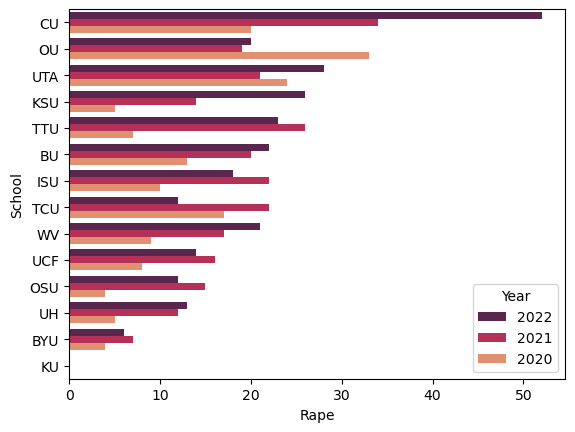

In [38]:
sns.barplot(x='Rape', y='School', data=SA_DV_pivot, hue='Year', palette='rocket', order=SA_DV_pivot.sort_values('Rape', ascending=False, inplace=True))
plt.show()


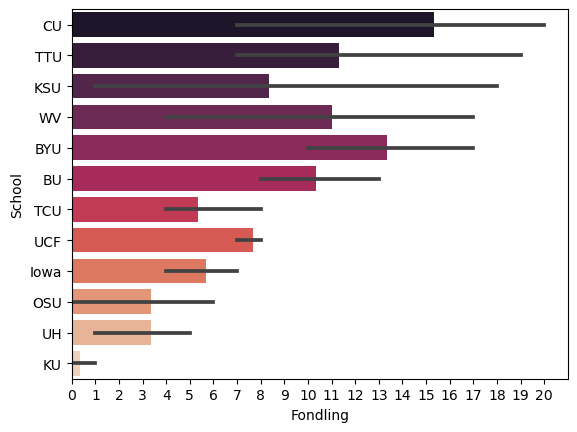

In [36]:
sns.barplot(x='Fondling', y='School', data=SA_DV_pivot, palette='rocket',order=SA_DV_pivot.sort_values('Fondling', ascending=False, inplace=True))
plt.xticks(np.arange(0, 21, 1))
plt.show()

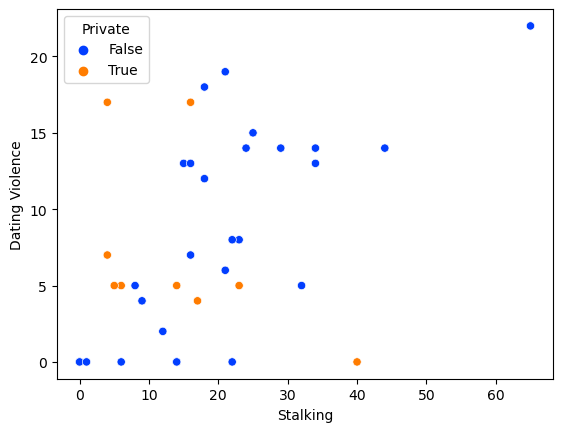

In [21]:
sns.scatterplot(x='Stalking', y='Dating Violence', data=SA_DV_pivot, hue='Private', palette='bright')
plt.show()
